# Examples of use the `multicurvefits` python  module
https://github.com/restrepo/straightfits

In [1]:
import sys
from pathlib import Path
cmd_folder=Path(Path.cwd()).parent.as_posix()
if cmd_folder not in sys.path:
     sys.path.insert(0, cmd_folder)

from multicurvefit import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np

# Fit to arXiv:1504.04276 
[![Home](./ID.png)](./)

e-Print: arXiv:1504.04276 

illustration of the impact of DM-related astrophysical uncertainties: the constraint for the bb¯bb¯ channel spans the shaded band when varying the propagation parameters (dashed lines) or the halo profiles (solid lines). Notice that in the {\sc Min} case the analysis is not sensible, hence not shown here (see text for details).

## Full data
g3data was used to obtain the data points:

`sudo apt-get g3data`

In [34]:
id_max=pd.read_csv('ID_max.dat',header=None)

In [35]:
id_best=pd.read_csv('ID_best.dat',header=None)
id_med=pd.read_csv('ID_med.dat',header=None)

##  Fit to "Ein MAX" data

In [36]:
x=id_max.columns[0];y=id_max.columns[1];
ID_max=curvefit(id_max[x].values,id_max[y].values)

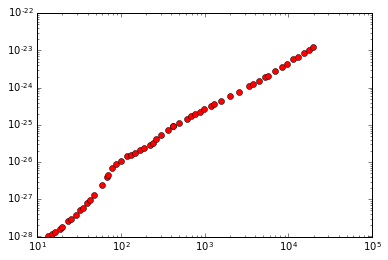

In [37]:
plt.loglog(ID_max.x,ID_max.y,'ro')

poly1d([  2.21409332e-01,  -7.29417226e+00,   1.08407218e+02,
        -9.60218902e+02,   5.63997670e+03,  -2.31196396e+04,
         6.77546457e+04,  -1.42893822e+05,   2.15050554e+05,
        -2.25063726e+05,   1.55394370e+05,  -6.35328900e+04,
         1.16027170e+04])

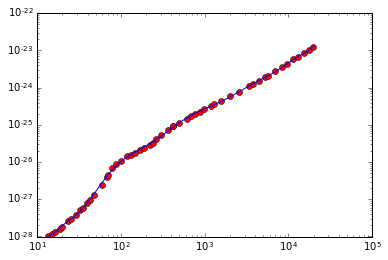

In [38]:
ID_max.add_fit(12)

(10, 20000)

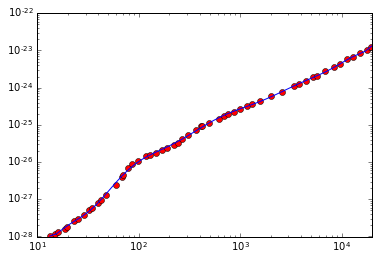

In [39]:
xmax=20000
plt.loglog(ID_max.x,ID_max.y,'ro')
xx=np.logspace(np.log10(ID_max.x[0]),np.log10(xmax))
plt.loglog(xx,ID_max(xx))
plt.xlim(10,xmax)

In [40]:
ID_max.to_csv('ID_max.csv')

## Check saved fit data 

In [41]:
ID_MAX=curvefit()
ID_MAX.read_csv('ID_max.csv')

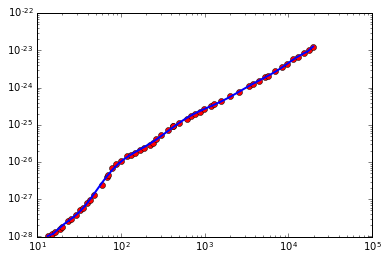

In [42]:
plt.loglog(ID_max.x,ID_max.y,'ro')
xx=np.logspace(np.log10(ID_max.x.min()),np.log10(ID_max.x.max()))
plt.loglog(xx,ID_MAX(xx),'b-',lw=2)
#plt.xlim(10,ID_MAX.corners.values[-1])

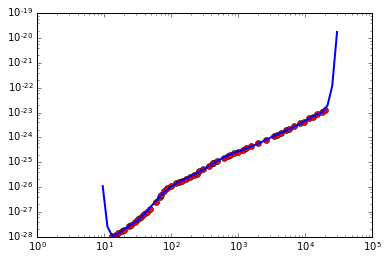

In [43]:
plt.loglog(ID_max.x,ID_max.y,'ro')
xx=np.logspace(np.log10(9.5),np.log10(3E4))
plt.loglog(xx,ID_MAX(xx),'b-',lw=2)
#plt.xlim(10,ID_MAX.corners.values[-1])

In [60]:
ams=multicurvefit(id_max[x],id_max[y])

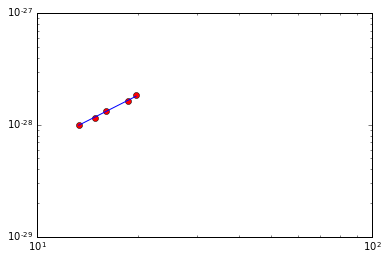

In [61]:
ams.add_curve(10,20,1)

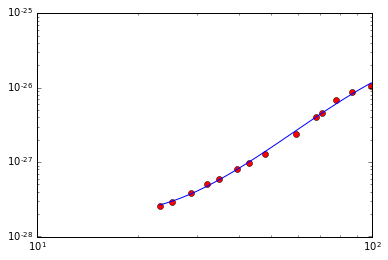

In [62]:
ams.add_curve(20,100,3)

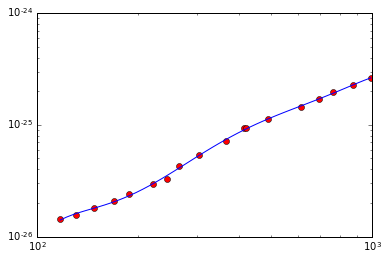

In [63]:
ams.add_curve(100,1000,6)

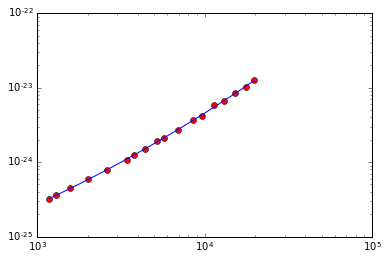

In [64]:
ams.add_curve(1000,20000,3)

In [65]:
ams.to_json('ID_max.json')

In [66]:
AMS=multicurvefit()
AMS.read_json('ID_max.json')

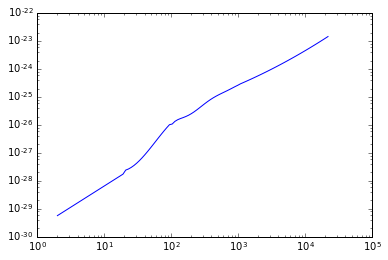

In [68]:
xx=np.logspace(log10(2),log10(22000),100)
plt.loglog(xx,AMS(xx,verbose=False))

#  Arxiv:1411.1335 Fig: 13
Fit to
[![Home](./sdfdm.png)](./)

##  Cross section data 

In [14]:
sdfdm_cs=pd.read_csv('sdfdm_cs.dat',header=None)

(100, 300)

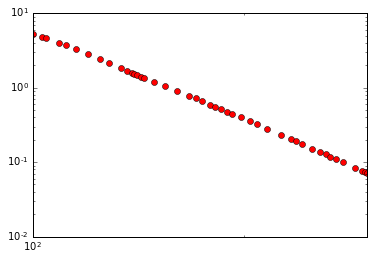

In [15]:
x=sdfdm_cs.columns[0];y=sdfdm_cs.columns[1];
SDFDM_cs=multicurvefit(sdfdm_cs[x].values,sdfdm_cs[y].values)
plt.loglog(SDFDM_cs.x,SDFDM_cs.y,'ro')
plt.xlim(100,300)

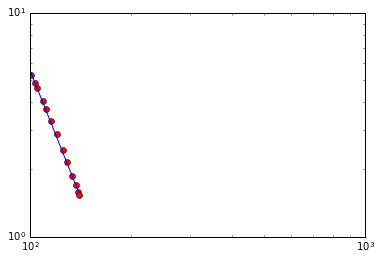

In [16]:
SDFDM_cs.add_curve(SDFDM_cs.x[0],140,1)

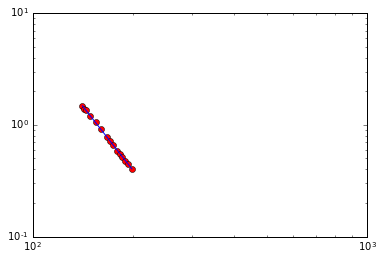

In [17]:
SDFDM_cs.add_curve(140,200,1)

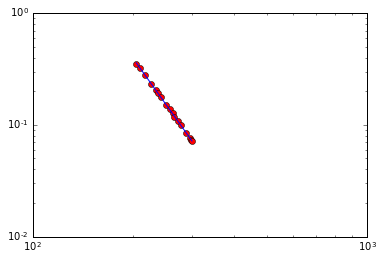

In [18]:
SDFDM_cs.add_curve(200,1000,1)

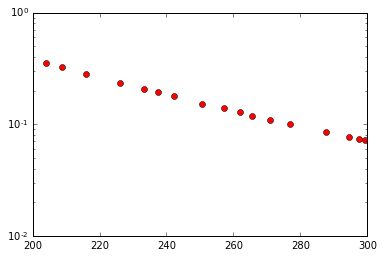

In [19]:
#check segment
chk=sdfdm_cs[np.logical_and(sdfdm_cs[x]>=200,sdfdm_cs[x]<300)]
plt.semilogy(chk[x],chk[y],'ro')

('WARNING: Out of fitted range:', 1000.0)


(100, 300)

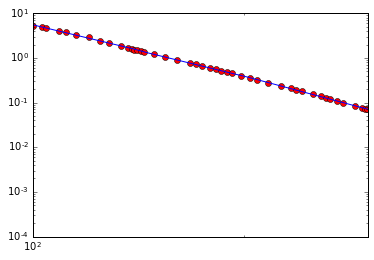

In [20]:
xmax=1000
plt.loglog(SDFDM_cs.x,SDFDM_cs.y,'ro')
xx=np.logspace(np.log10(SDFDM_cs.x[0]),np.log10(xmax))
plt.loglog(xx,SDFDM_cs(xx))
plt.xlim(100,300)

In [21]:
SDFDM_cs.to_json('SDFDM_cs.json')

In [22]:
SDFDM_cs.polys.to_json('SDFDM_cs.json')

## Check saved fit data 

In [23]:
SDFDM_CS=multicurvefit()
SDFDM_CS.read_json('SDFDM_cs.json')

(100, 300)

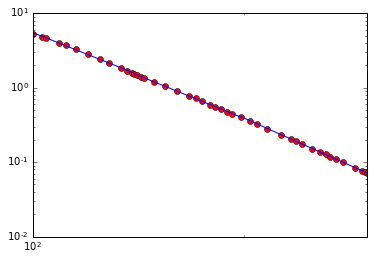

In [24]:
xmax=1000
plt.loglog(SDFDM_cs.x,SDFDM_cs.y,'ro')
xx=np.logspace(np.log10(SDFDM_cs.x.min()),np.log10(SDFDM_cs.x.max()))
plt.loglog(xx,SDFDM_CS(xx))
plt.xlim(100,300)

## Exclude cross section data

In [25]:
sdfdm_exc_cs=pd.read_csv('sdfdm_exc_cs.dat',header=None)
x=sdfdm_exc_cs.columns[0];y=sdfdm_exc_cs.columns[1]

In [26]:
sdfdm_exc_cs=sdfdm_exc_cs.append({x:1000,y:sdfdm_exc_cs[y].values[-1]},ignore_index=True)

(100, 1000)

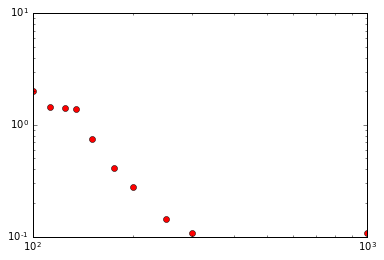

In [27]:
SDFDM_exc_cs=multicurvefit(sdfdm_exc_cs[x].values,sdfdm_exc_cs[y].values)
plt.loglog(SDFDM_exc_cs.x,SDFDM_exc_cs.y,'ro')
plt.xlim(100,1000)

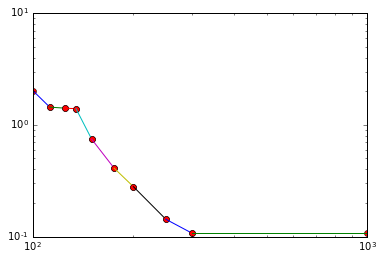

In [28]:
for i in range(sdfdm_exc_cs.shape[0]-1):
    SDFDM_exc_cs.add_curve(sdfdm_exc_cs[x].values[i],sdfdm_exc_cs[x].values[i+1],1,ShowPlot=False)

(100, 1000.0)

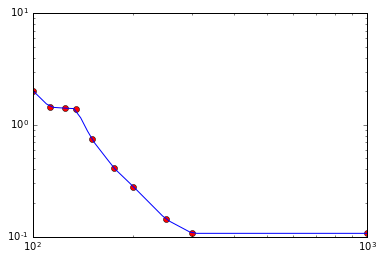

In [29]:
xmax=sdfdm_exc_cs[x].values[i+1]
plt.loglog(SDFDM_exc_cs.x,SDFDM_exc_cs.y,'ro')
xx=np.logspace(np.log10(SDFDM_exc_cs.x[0]),np.log10(xmax-0.1))
plt.loglog(xx,SDFDM_exc_cs(xx))
plt.xlim(100,xmax)

In [30]:
SDFDM_exc_cs.to_json('SDFDM_exc_cs.json')

In [31]:
SDFDM_exc_cs.polys.to_json('SDFDM_exc_cs.json')

## Check save fit data 

In [32]:
SDFDM_exc_CS=multicurvefit()
SDFDM_exc_CS.read_json('SDFDM_exc_cs.json')

('WARNING: Out of fitted range:', 1000.0)


(100, 1000)

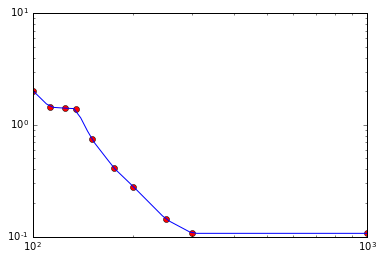

In [33]:
xmax=1000
plt.loglog(SDFDM_exc_cs.x,SDFDM_exc_cs.y,'ro')
xx=np.logspace(np.log10(SDFDM_exc_cs.x.min()),np.log10(SDFDM_exc_cs.x.max()))
plt.loglog(xx,SDFDM_exc_CS(xx))
plt.xlim(100,xmax)

## See further examples:
[examples](./examples/example_straightfits.ipynb)